In [30]:
import sys
import os
import glob
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df = pd.read_csv('../../01 Data/03 Consolidated/authors_with_gender_v111.csv')

In [147]:
# df

### Check which decade has maximum number of genders for author names

###### Make yr column

In [4]:
# Change format to datetime
df['date'] = df['date'].astype('datetime64[ns]')

# As no time val, extract date, yrmo, yr
df['YearMonth'] = df['date'].map(lambda x: 100*x.year + x.month)
df['year'] = pd.DatetimeIndex(df['date']).year

In [148]:
df.tail(5)

,paper_id,date,name,fname,lname,affiliationIds,norm_fname,gender,YearMonth,year,gen_bool
2503838,10.1103/PhysRevSTAB.14.014001,2011-01-21,Mikhail Zobov,Mikhail,Zobov,a2,mikhail,male,201101,2011,1
2503839,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Lorusso,A.,Lorusso,a1,a,NaN,201109,2011,0
2503840,10.1103/PhysRevSTAB.14.090401,2011-09-15,F. Gontad,F.,Gontad,a1,f,NaN,201109,2011,0
2503841,10.1103/PhysRevSTAB.14.090401,2011-09-15,A. Perrone,A.,Perrone,a1,a,NaN,201109,2011,0
2503842,10.1103/PhysRevSTAB.14.090401,2011-09-15,N. Stankova,N.,Stankova,a2,n,NaN,201109,2011,0


##### Identify if gender available for that author

In [92]:
df['gen_bool'] = df['gender'].apply(lambda x: 1 if x == 'male' or x == 'female' else 0)

##### Rollup data at year level, to see count of authors, and count of authors with genders for that year

In [93]:
df_yr = df.groupby(['year']).agg({'name': 'count', 'gen_bool': 'sum'}).reset_index()

In [94]:
df_yr

,year,name,gen_bool
0,1893,20,7
1,1894,25,5
2,1895,33,5
3,1896,31,2
4,1897,56,9
...,...,...,...
121,2014,89605,22915
122,2015,90298,23463
123,2016,97724,26217
124,2017,103318,29146


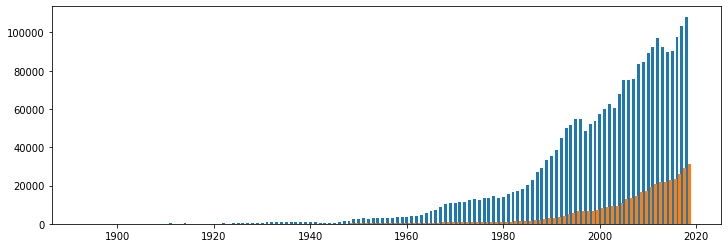

In [151]:
fig = plt.figure(figsize=(12, 4))
width = 0.6
plt.bar(df_yr.year, df_yr.name, width )
plt.bar(df_yr.year + width , df_yr.gen_bool, width )
plt.show()

##### Filter data for 1950 and abaove

In [152]:
df2 = df_yr[df_yr.year > 1950]

###### Cut data into differnt decades

In [155]:
df2['yr_subset'] = pd.cut(df2['year'], [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
df2

/Users/adityagupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,name,gen_bool,yr_subset
58,1951,2950,308,"(1950, 1960]"
59,1952,2619,275,"(1950, 1960]"
60,1953,2985,326,"(1950, 1960]"
61,1954,3288,337,"(1950, 1960]"
62,1955,2896,306,"(1950, 1960]"
...,...,...,...,...
121,2014,89605,22915,"(2010, 2020]"
122,2015,90298,23463,"(2010, 2020]"
123,2016,97724,26217,"(2010, 2020]"
124,2017,103318,29146,"(2010, 2020]"


###### Rollup data at decade level

In [156]:
df3 = df2.groupby(['yr_subset']).agg({'name': 'sum', 'gen_bool': 'sum'}).reset_index()

In [157]:
df3

,yr_subset,name,gen_bool
0,"(1950, 1960]",30972,3221
1,"(1960, 1970]",72771,5964
2,"(1970, 1980]",130095,8722
3,"(1980, 1990]",235555,19366
4,"(1990, 2000]",506367,59634
5,"(2000, 2010]",733424,132351
6,"(2010, 2020]",770794,197930


##### Calculate % of authors who had gender info for that decade

In [158]:
df3['data_w_gender'] = round(100*df3.gen_bool/df3.name, 1)

In [159]:
df3

,yr_subset,name,gen_bool,data_w_gender
0,"(1950, 1960]",30972,3221,10.4
1,"(1960, 1970]",72771,5964,8.2
2,"(1970, 1980]",130095,8722,6.7
3,"(1980, 1990]",235555,19366,8.2
4,"(1990, 2000]",506367,59634,11.8
5,"(2000, 2010]",733424,132351,18.0
6,"(2010, 2020]",770794,197930,25.7


In [160]:
# Convert type for easy plotting
df3['yr_subset'] = df3['yr_subset'].astype(str)

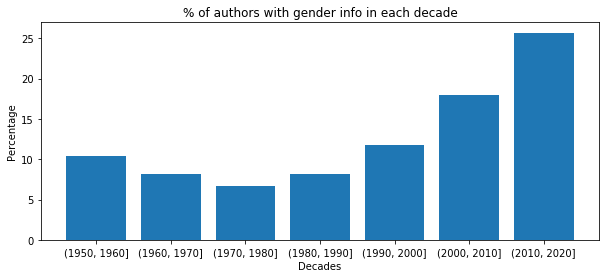

In [164]:
fig = plt.figure(figsize=(10, 4))
plt.bar(df3['yr_subset'], df3['data_w_gender'])
plt.xlabel('Decades')
plt.ylabel('Percentage')
plt.title('% of authors with gender info in each decade')
plt.savefig('../../04 Plots/% of authors with gender info in each decade.png')
plt.show()